In [1]:
import torch
import torchvision.models as models
from torchview import draw_graph
import os
from pathlib import Path

MODEL_NAMES = [
    "resnet50_baseline", 
    "resnet50_finetuned", 
    "efficientnet_b0_finetuned", 
    "convnext_tiny_finetuned"
]

Generating graph for: resnet50_baseline


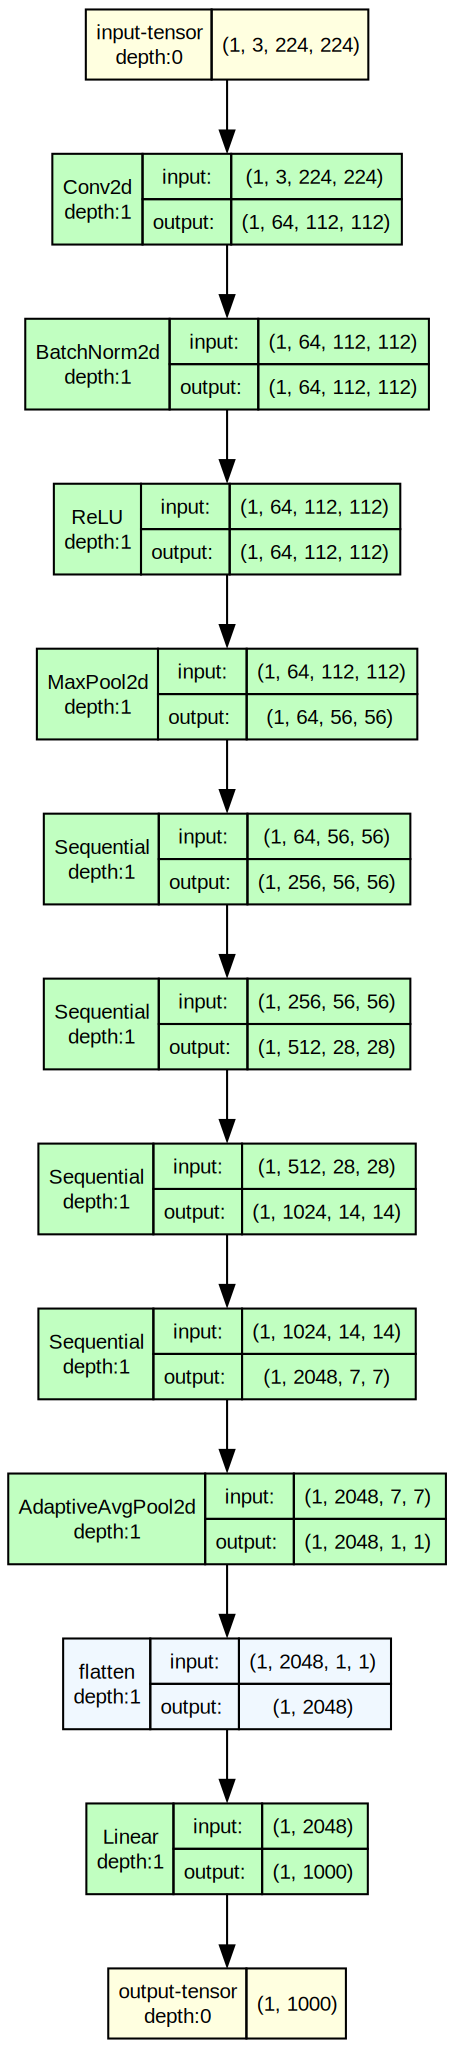

Generating graph for: resnet50_finetuned


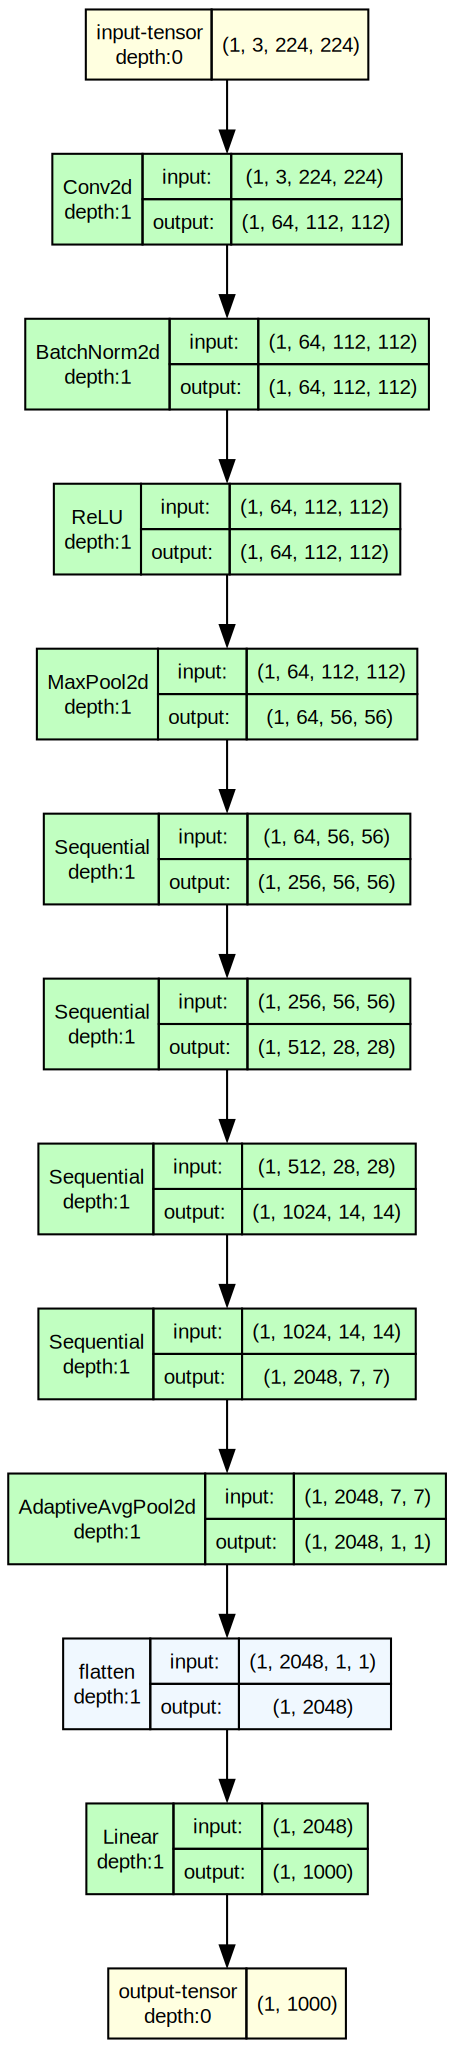

Generating graph for: efficientnet_b0_finetuned


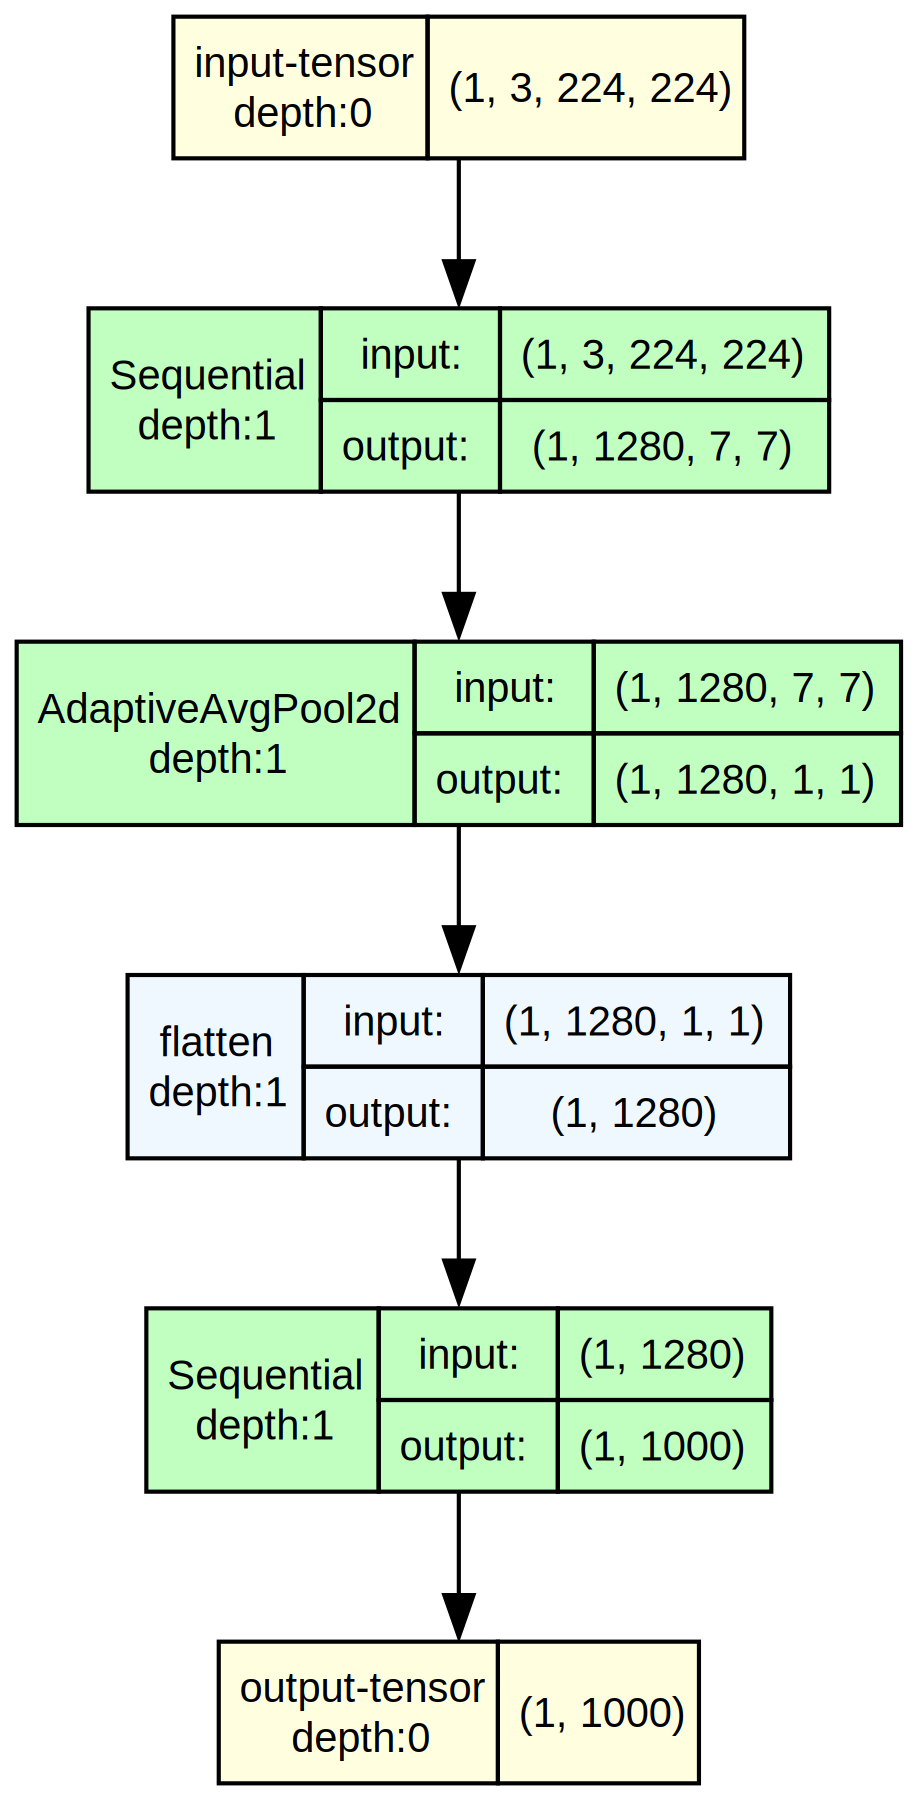

Generating graph for: convnext_tiny_finetuned


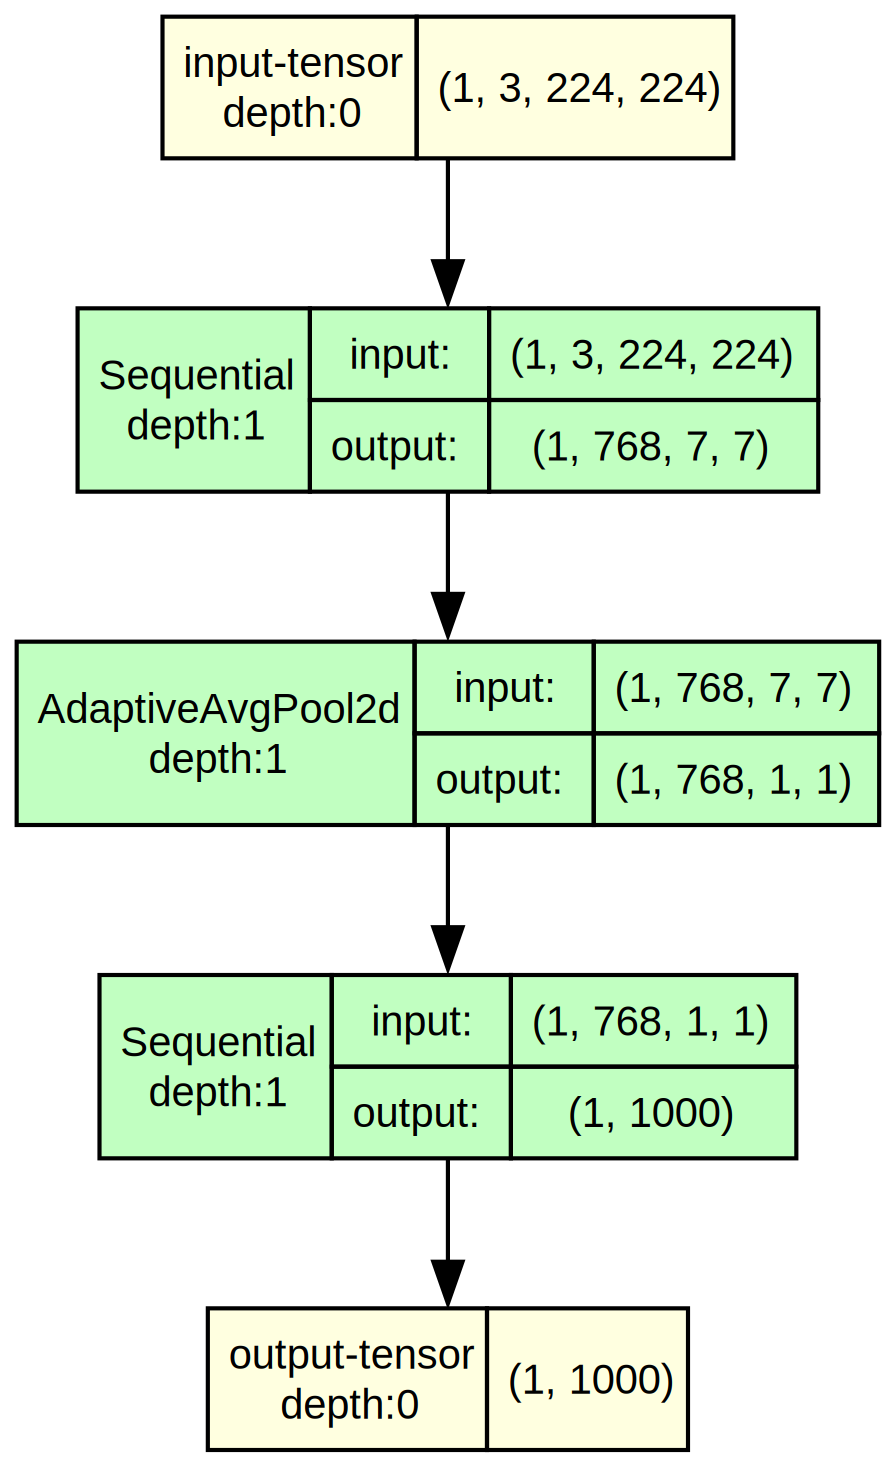

In [2]:
notebooks_dir = Path.cwd().resolve()
project_root = notebooks_dir.parent

# Corrected paths based on your folder structure
MODEL_DIR = project_root / "models"

def get_model_instance(name):
    # Map the string names to actual torchvision constructors
    if "resnet50" in name:
        return models.resnet50()
    elif "efficientnet_b0" in name:
        return models.efficientnet_b0()
    elif "convnext_tiny" in name:
        return models.convnext_tiny()
    else:
        raise ValueError(f"Architecture for {name} not recognized.")

for name in MODEL_NAMES:
    print(f"Generating graph for: {name}")
    
    # 1. Instantiate the architecture
    model = get_model_instance(name)
    
    # 2. Load the weights (Optional: skip if you only care about structure)
    model_path = os.path.join(MODEL_DIR, f"{name}.pth")
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path, map_location='cpu'))
    
    # 3. Visualize
    model_graph = draw_graph(
        model, 
        input_size=(1, 3, 224, 224),
        device="cuda",
        graph_name=name,
        depth=1,
        expand_nested=True,
        directory=f"{project_root}\\results\\charts\\structures"
    )
    model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
    model_graph.visual_graph.graph_attr["fontname"] = "Helvetica"
    model_graph.visual_graph.edge_attr["fontname"] = "Helvetica"
    model_graph.visual_graph.graph_attr["dpi"] = "300"
    # Display in notebook
    display(model_graph.visual_graph) 